# 线性回归预测房价

任务：<br>
基于user_housing_price.csv数据，建立线性回归模型，预测合理房价<br>
1、以面积为输入变量，建立单因子模型，以评估模型表现，可视化线性回归预测结果<br>
2、以income,house age,number of rooms,population,area为输入变量，建立多因子模型，评估模型表现<br>
3、预测Income=65000,House Age = 5,Number Of Rooms = 5,Population=30000,size=2000的合理房价

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 读取数据
data = pd.read_csv("usa_housing_price.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


In [3]:
from matplotlib import pyplot as plt

In [4]:
fig = plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

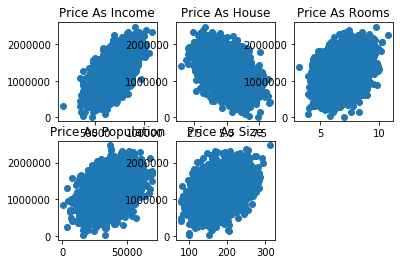

In [5]:
fig1 = plt.subplot(231)
plt.scatter(data.loc[:,"Avg. Area Income"],data.loc[:,'Price'])
plt.title("Price As Income")

fig2 = plt.subplot(232)
plt.scatter(data.loc[:,"Avg. Area House Age"],data.loc[:,'Price'])
plt.title("Price As House")

fig3 = plt.subplot(233)
plt.scatter(data.loc[:,"Avg. Area Number of Rooms"],data.loc[:,'Price'])
plt.title("Price As Rooms")

fig4 = plt.subplot(234)
plt.scatter(data.loc[:,"Area Population"],data.loc[:,'Price'])
plt.title("Price As Population")

fig5 = plt.subplot(235)
plt.scatter(data.loc[:,"size"],data.loc[:,'Price'])
plt.title("Price As Size")
plt.show()

## 任务1

In [6]:
# 定义x和y
x = data.loc[:,'size']
y = data.loc[:,'Price']

建立单因子模型

In [7]:
# 导入相关库
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [8]:
# 维度转化
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [9]:
# 训练模型
lr_model.fit(x,y)

LinearRegression()

计算单因子size下的价格

In [10]:
y_predict = lr_model.predict(x)

评估模型

In [11]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error_1 = mean_squared_error(y,y_predict)
r2_score_1 = r2_score(y,y_predict)
print(mean_squared_error_1)# 数值不好衡量大小
print(r2_score_1)# 0.12距离1很远，说明模型不好

108771672553.6264
0.1275031240418234


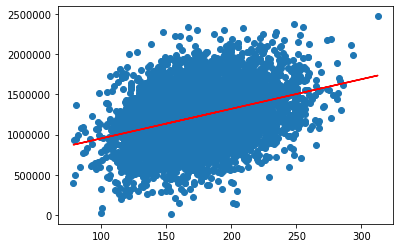

In [12]:
fig6 = plt.figure()
plt.scatter(x,y)
plt.plot(x,y_predict,'r')
plt.show()

根据上述图，我们可以发现，这个模型很难对我们评价房屋价格是否合理做出判断依据

# 任务2

In [13]:
X_multi = data.drop(['Price'],axis=1)
X_multi

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273545
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659
...,...,...,...,...,...
4995,60567.94414,3.169638,6.137356,22837.36103,161.641403
4996,78491.27543,4.000865,6.576763,25616.11549,159.164596
4997,63390.68689,3.749409,4.805081,33266.14549,139.491785
4998,68001.33124,5.465612,7.130144,42625.62016,184.845371


建立模型

In [14]:
lr_model2 = LinearRegression()
lr_model2.fit(X_multi,y)

LinearRegression()

In [15]:
# 模型预测
y_predict_multi = lr_model2.predict(X_multi)

In [16]:
y_predict_multi

array([[1223968.89166087],
       [1497306.3318863 ],
       [1250884.31019438],
       ...,
       [1020693.92390375],
       [1260503.36914585],
       [1302737.7915763 ]])

In [17]:
mean_squared_error_2 = mean_squared_error(y,y_predict_multi)
r2_score_2 = r2_score(y,y_predict_multi)
print(mean_squared_error_2)# 数值不好衡量大小
print(r2_score_2)# 距离1很近，说明模型有了显著的提升

10219846512.177862
0.9180229195220739


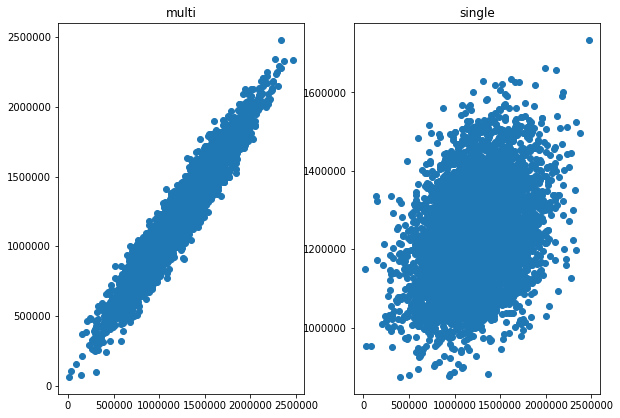

In [18]:
plt.figure(figsize=(15,15))
fig_multi = plt.subplot(231)
plt.scatter(y,y_predict_multi)
plt.title("multi")

fig_single = plt.subplot(232)
plt.scatter(y,y_predict)
plt.title("single")
plt.show()

通过对比多因子和单因子的线性回归，我们发现多因子的更准确的反应了预测情况

# 任务3

In [19]:
x_test = [65000,5,5,30000,200]

In [20]:
x_test = np.array(x_test).reshape(-1,1)

In [23]:
y_test_predict = lr_model2.predict(x_test)